In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [35]:
attr1 = 'petal.length'
attr2 = 'petal.width'

df = df[[attr1, attr2, 'variety']]
X = df[[attr1, attr2]]
y = df['variety']

In [36]:
variety = df['variety'].unique()
n_classes = len(variety)

print(variety)
print(f'Broj klasa: {n_classes}')

['Setosa' 'Versicolor' 'Virginica']
Broj klasa: 3


In [37]:
mapping_name_to_i = dict(zip(variety, range(n_classes)))
mapping_i_to_name = dict(zip(range(n_classes), variety))

print(mapping_name_to_i)
print(mapping_i_to_name)

{'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}
{0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}


In [38]:
y = y.replace(mapping_name_to_i)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: variety, dtype: int64

In [39]:
clf = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=7)

In [41]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [42]:
clf.score(X_train, y_train)

0.9904761904761905

In [43]:
clf.score(X_test, y_test)

0.9333333333333333

In [54]:
y_test_predict = clf.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_test_predict)
conf_matrix

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  2, 13]])

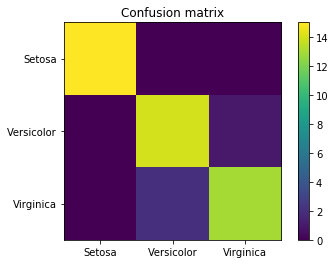

In [52]:
plt.imshow(conf_matrix)
plt.colorbar()
plt.xticks(range(n_classes), mapping_name_to_i.keys())
plt.yticks(range(n_classes), mapping_name_to_i.keys())

plt.title('Confusion matrix')
plt.show()

In [59]:
print(metrics.classification_report(y_test, y_test_predict))
for (k, v) in mapping_i_to_name.items():
    print(f'{k} -> {v}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

0 -> Setosa
1 -> Versicolor
2 -> Virginica
